# Scattering in spherical coordinates
We consider the scattering of two particles interacting through a barrier in the $L=0$ (or s-) wave. 

# Hard sphere
A hard sphere corresponds to an infinitely repulsive potential or, mathematically, 
$V_0 \to \infty$, $a_s=R$. 

The hard sphere model is useful because it allows us to look at what happens for the scattering of partial waves with 
$l>0$. The infinitely 
repulsive well forces the wavefunctions to vanish at $r=R$, so that $u_l(r<R)=0$. 
At $r>R$, the 
Schrödinger equation is nothing but the spherical Bessel equation.
We know the solutions to this equation must be linear combinations
of the independent functions $j_l(kr)$ and $n_l(kr)$ with at most a phase difference, so
\begin{align}
R_l( k, r )= A \left[ j_l(kr) \cos \delta_l(k) + n_l(kr) \sin \delta_l(k) \right] \, ,
\end{align}
The boundary condition imposed by the hard sphere at $r=R$ is such that 
\begin{align}
R_l( k, R )=0 \Rightarrow j_l(kR) \cos \delta_l = - n_l(kR) \sin \delta_l \, ,
\end{align}
and so 
\begin{align}
\delta_l = \arctan \left( - \frac{j_l( kR )}{n_l( kR )} \right) \, .
\end{align}
At $l=0$, $\delta_0 =- k R$ exactly, which agrees with the repulsive barrier result in the limit $V_0 \gg 1$. 
One can also compute the contributions to the total cross section
\begin{align}
\sigma = \sum_l \sigma_l = \frac{4 \pi}{k^2} \sum_l (2l+1) \sin^2 \delta_l \, .
\end{align}

For higher $l$, we can 
extract useful information in the limit of very low energies, $kR \ll 1$. Using the expansions of these functions, one finds
\begin{align}
\delta_l \approx \arctan \left( - \frac{  (kR)^{2l+1}}{(2l+1)!! (2l-1)!!} \right) \approx 
- \frac{  (kR)^{2l+1}}{(2l+1)!! (2l-1)!!} \, .
\end{align}
For a fixed value of $k$ and $R$, the phase-shift becomes smaller as $l$ increases. 
This can be interpreted as the fact that higher $l$ modes
are pushed away from the center by the centrifugal barrier. 
This indicates that the, at least for low energies, the 
partial wave expansion converges quickly and we do not need many terms to keep all the information
of the cross section.                       

-2.9269908169872414
L=0
L=1


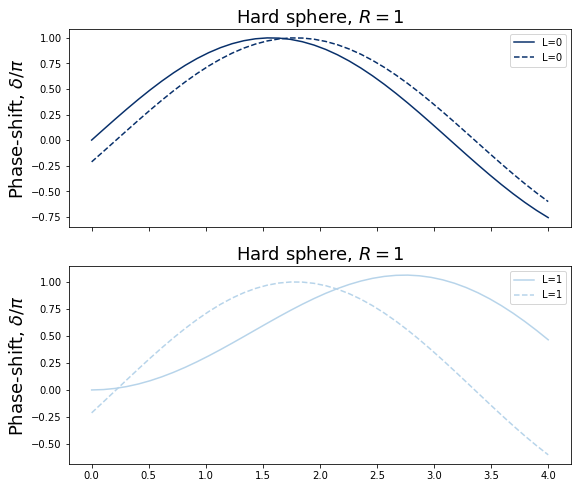

In [67]:
# coding: utf-8
#########################################################################################
# THIS PYTHON CODE GIVES THE PHASE SHIFTS FOR SCATTERING OFF A REPULSIVE BARRIER
#########################################################################################
import math
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.special import spherical_jn,spherical_yn

zi=complex(0,1);
pi=math.pi
epsilon=0.001


def phaseshift_hs(l,k,R) :
    jn=spherical_jn(l,k*R)
    yn=spherical_yn(l,k*R)
#    ph0= np.arctan2( -jn,yn)%pi + 1
    ph0= np.arctan2( -jn,yn)
    ph=ph0
    return ph
Lmax=2
fig, ax = plt.subplots(figsize=(9,8), ncols=1, nrows=Lmax, sharex=True)
c_full = plt.cm.Blues(np.linspace(0.3,1,Lmax))   

R=1;
k_momentum=1;
rr=np.linspace(epsilon,4,40)
ps=phaseshift_hs(ll,k_momentum,R)
print(ps)
for ll in range(Lmax) :
    lab="L="+str(ll)
    print(lab)
    wf0=rr*spherical_jn(ll,k_momentum*rr)
    wf1=-np.sin(k_momentum*rr - ps)
    
    ax[ll].plot(rr,wf0,label=lab,color=c_full[Lmax-ll-1])
    ax[ll].plot(rr,wf1,label=lab,color=c_full[Lmax-ll-1],linestyle="dashed")
    ax[ll].legend()
    ax[ll].set_ylabel(r"Phase-shift, $\delta/\pi$",fontsize=18)
    ax[ll].set_title("Hard sphere, $R=$"+str(R),fontsize=18)


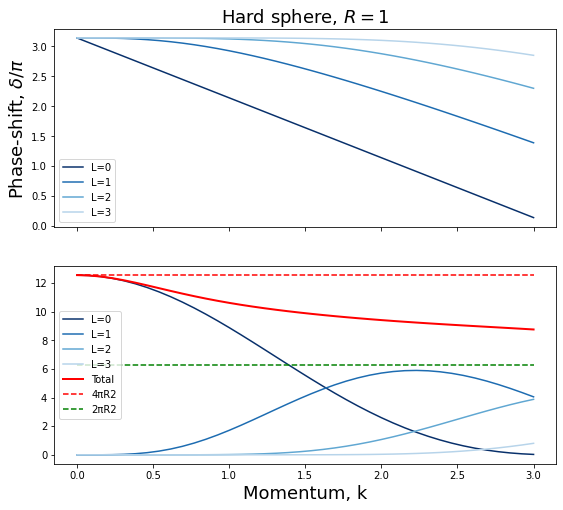

In [47]:
# coding: utf-8
#########################################################################################
# THIS PYTHON CODE GIVES THE PHASE SHIFTS FOR SCATTERING OFF A REPULSIVE BARRIER
#########################################################################################
import math
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.special import spherical_jn,spherical_yn

zi=complex(0,1);
pi=math.pi
epsilon=0.001

def phaseshift_hs(l,k,R) :
    jn=spherical_jn(l,k*R)
    yn=spherical_yn(l,k*R)
#    ph0= np.arctan2( -jn,yn)%pi + 1
    ph0= np.arctan2( jn,yn)
    ph=ph0
    return ph

# THE RADIUS OF THE SCATTERING BARRIER
R=1;
Nk_below=40
kmom=np.linspace(epsilon,3,Nk_below)
cross_section_l=np.zeros_like(kmom)
cross_section=np.zeros_like(kmom)
                    
fig, (ax1,ax2) = plt.subplots(figsize=(9,8), ncols=1, nrows=2, sharex=True)

Lmax=4
c_full = plt.cm.Blues(np.linspace(0.3,1,Lmax))   
for ll in range(Lmax) :
    lab="L="+str(ll)
    ps=phaseshift_hs(ll,kmom,R)
    ax1.plot(kmom,ps,label=lab,color=c_full[Lmax-ll-1])
    ax1.legend()
    ax1.set_ylabel(r"Phase-shift, $\delta/\pi$",fontsize=18)
    ax1.set_title("Hard sphere, $R=$"+str(R),fontsize=18)
    
    cross_section_l=4*pi/np.power(kmom,2)*(2*ll+1)*np.power(np.sin( ps ),2)
    cross_section = cross_section + cross_section_l
    
    ax2.plot(kmom,cross_section_l,label=lab,color=c_full[Lmax-ll-1])
    if( ll== Lmax-1 ) :
        ax2.plot(kmom,cross_section,label="Total",color='r',linewidth=2)
        ax2.plot(kmom,np.ones_like(kmom)*4*pi*np.power(R,2),color='r',linestyle="dashed",label=r"4πR2")
        ax2.plot(kmom,np.ones_like(kmom)*2*pi*np.power(R,2),color='g',linestyle="dashed",label=r"2πR2")

    ax2.legend()
    ax2.set_xlabel("Momentum, k",fontsize=18)
